# State Transition - only states

In [1]:
import numpy as np
import os
from libraries.utils import *
from libraries.state_transition import StateTransition as st
import pandas as pd
from collections import defaultdict


## Load Data

In [2]:
############ configuration ################
############################################

CODE = 'theft_protection'       ### application (code)
BEHAVIOUR_FAULTY = 'faulty_data'            ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'            ### normal, faulty_data
THREAD = 'single'           ### single, multi
VER = 3                     ### format of data collection

base_dir = '../trace_data' ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print(normalbase_path)
print(faultybase_path)


../trace_data/theft_protection/single_thread/version_3/normal
../trace_data/theft_protection/single_thread/version_3/faulty_data


In [3]:

train_base_path = os.path.join(normalbase_path, 'train_data')
train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
print(train_data_path)


######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

### remove.Ds_store from all lists
paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

print(paths_log)
print(paths_traces)
print(varlist_path)
print(paths_label)

test_data_path = paths_traces
test_label_path = paths_label


['../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json', '../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_2050_2300.json', '../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_150_900.json', '../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_0_110.json']
['../trace_data/theft_protection/single_thread/version_3/faulty_data/log1-com', '../trace_data/theft_protection/single_thread/version_3/faulty_data/log2-sensor', '../trace_data/theft_protection/single_thread/version_3/faulty_data/log3-bitflip']
['../trace_data/theft_protection/single_thread/version_3/faulty_data/trace1-com', '../trace_data/theft_protection/single_thread/version_3/faulty_data/trace2-sensor', '../trace_data/theft_protection/single_thread/version_3/faulty_data/trace3-bitflip']
['../trace_data/theft_protection/single_thread/version_3/faulty_data/varlist1-com', '../trace_data/theft_prot

In [4]:
############# check varlist is consistent ############
############# only for version 3 ######################

if VER == 3:
    to_number = is_consistent(varlist_path)

    if to_number != False:
        from_number = mapint2var(to_number)


varlist 1 is consistent with varlist 0
{'1-0-main-g_ack': 13, '1-control-update_txmsg-0': 12, '1-0-main-lora': 2, '1-0-main-temperature': 8, '1-0-main-ow': 0, '1-0-main-events': 14, '1-0-main-com_timer': 4, '1-control-update_rxmsg-drop': 15, '1-0-loracom-data': 11, '1-control-readdata-0': 10, '1-0-main-temp': 1, '1-0-main-s': 3, '1-control-updatedata-cls.sensor_data': 9, '1-0-sense-temperature': 7, '1-0-main-i': 6, '1-control-init_timer0-0': 5} {'1-0-main-g_ack': 13, '1-control-update_txmsg-0': 12, '1-0-main-lora': 2, '1-0-main-temperature': 8, '1-0-main-ow': 0, '1-0-main-events': 14, '1-0-main-com_timer': 4, '1-control-update_rxmsg-drop': 15, '1-0-loracom-data': 11, '1-control-readdata-0': 10, '1-0-main-temp': 1, '1-0-main-s': 3, '1-control-updatedata-cls.sensor_data': 9, '1-0-sense-temperature': 7, '1-0-main-i': 6, '1-control-init_timer0-0': 5}


In [5]:
############ Get variable list ######################
sorted_keys = list(from_number.keys())
sorted_keys.sort()
var_list = [from_number[key] for key in sorted_keys]   ### get the variable list
# print(var_list)

In [6]:
print(train_data_path[0])
print(train_data_path[0].find('.npy'))
print(train_data_path[0].find('.json') )

if train_data_path[0].find('.npy') != -1:
    sample_data = load_sample(train_data_path[0])
    print('.npy')
elif train_data_path[0].find('.json') != -1:
    sample_data = read_traces(train_data_path[0])
    print('.json')

../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json
-1
91
.json


## Training

In [7]:
### initialize
model = st()
model.train(train_data_path)

../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_1250_2000.json
../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_2050_2300.json
../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_150_900.json
../trace_data/theft_protection/single_thread/version_3/normal/train_data/interval_0_110.json


In [8]:
transitions = model.transitions
transitions

defaultdict(list,
            {13: [14],
             14: [15],
             15: [6],
             6: [7],
             7: [8],
             8: [9],
             9: [6, 10, 13],
             10: [11],
             11: [12],
             12: [6],
             0: [1],
             1: [2],
             2: [3],
             3: [4],
             4: [5],
             5: [6]})

In [9]:
### viz transitions

for key in transitions.keys():
    print(from_number[key], ':', end=' ')
    for val in transitions[key]:
        print(from_number[val], end=', ')
    print('\n')

1-0-main-g_ack : 1-0-main-events, 

1-0-main-events : 1-control-update_rxmsg-drop, 

1-control-update_rxmsg-drop : 1-0-main-i, 

1-0-main-i : 1-0-sense-temperature, 

1-0-sense-temperature : 1-0-main-temperature, 

1-0-main-temperature : 1-control-updatedata-cls.sensor_data, 

1-control-updatedata-cls.sensor_data : 1-0-main-i, 1-control-readdata-0, 1-0-main-g_ack, 

1-control-readdata-0 : 1-0-loracom-data, 

1-0-loracom-data : 1-control-update_txmsg-0, 

1-control-update_txmsg-0 : 1-0-main-i, 

1-0-main-ow : 1-0-main-temp, 

1-0-main-temp : 1-0-main-lora, 

1-0-main-lora : 1-0-main-s, 

1-0-main-s : 1-0-main-com_timer, 

1-0-main-com_timer : 1-control-init_timer0-0, 

1-control-init_timer0-0 : 1-0-main-i, 



## Validation

In [10]:
#### Validate model
all_detections = []  ### format [file1_detection, file2_detection] -> file1_detection: [(state1, state2), (ts1, ts2), filename]
y_pred_all = []
y_true_all = []
all_tp = []
all_fp = []
for test_data, test_label in zip(test_data_path, test_label_path):
    detection = model.test_single(test_data)
    all_detections += [(test_data, detection, test_label)]  ### used to plot detections
    print('Detections:', detection)
    print(len(detection))


    ground_truth_raw = read_traces(test_label)
    ground_truth = ground_truth_raw['labels']
    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]
    print('ground truths:', ground_truth)
    print(len(ground_truth))

    correct_pred, rest_pred, y_pred, y_true = model.get_correct_detections(detection, ground_truth)

    y_pred_all.extend(y_pred)
    y_true_all.extend(y_true)
    all_tp += [(test_data, correct_pred, test_label)]
    all_fp += [(test_data, rest_pred, test_label)]
    


# result = model.test(test_data_path)

{13: [14], 14: [15], 15: [6], 6: [7], 7: [8], 8: [9], 9: [6, 10, 13], 10: [11], 11: [12], 12: [6], 0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5: [6]}
../trace_data/theft_protection/single_thread/version_3/faulty_data/trace1-com
Anomaly Detected: [(8, 6), (192998, 193261), 'trace1-com']
Anomaly Detected: [(8, 6), (255580, 255850), 'trace1-com']
Anomaly Detected: [(8, 13), (428213, 428467), 'trace1-com']
Detections: [[(8, 6), (192998, 193261), 'trace1-com'], [(8, 6), (255580, 255850), 'trace1-com'], [(8, 13), (428213, 428467), 'trace1-com']]
3
ground truths: [[180, 185, 37775, 38831, 1], [199, 204, 41993, 43048, 1], [322, 327, 67337, 68393, 1], [419, 424, 87403, 88459, 1], [516, 521, 107472, 108529, 1], [539, 544, 112741, 113797, 1], [636, 641, 132810, 133867, 1], [733, 738, 152877, 153933, 1], [878, 883, 182463, 183518, 1], [901, 906, 187732, 188789, 1], [920, 924, 191951, 193261, 2], [942, 947, 197475, 198530, 1], [965, 970, 202743, 203799, 1], [1110, 1115, 232341, 233397, 1], [1218, 1225

In [11]:
print('y_pred', y_pred_all)
print('y_true', y_true_all)
print(len(y_true_all))

y_pred [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
149


Precision: 1.0000
Recall: 0.8389
F1 Score: 0.9124
Confusion Matrix:
[[  0   0]
 [ 24 125]]


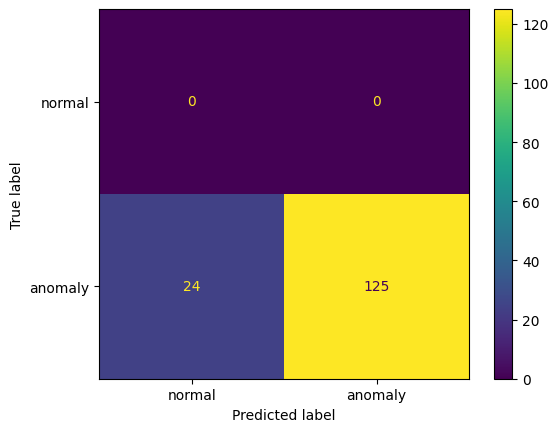

In [12]:
### Evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, average_precision_score, ConfusionMatrixDisplay


# Calculate precision
precision = precision_score(y_true_all, y_pred_all)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true_all, y_pred_all)
print(f'Recall: {recall:.4f}')

# # Calculate average precision
# average_precision = average_precision_score(y_true_all, y_pred_all)
# print(f'Average Precision: {average_precision:.4f}')

# Calculate F1 score
f1 = f1_score(y_true_all, y_pred_all)
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['normal', 'anomaly'])
disp.plot()

## Plot Detections

In [13]:
### plot gt and detections
# for test_data, detections, test_label_path in all_detections:
for test_data, detections, test_label_path in all_tp:
    print('test_data:', test_data)
    print('detections:', detections)

    ### prepare trace to plot
    col_data = preprocess_traces([test_data])
    all_df = get_dataframe(col_data) 
    # print(all_df[0])

    ### prepare detections to plot
    timestamps = col_data[0][1]
    print('timestamps:', timestamps)
    plot_val = []
    plot_x_ticks = []
    plot_class = []
    for det in detections:
        print(det)
        det_ts1, det_ts2 = det[1]
        print(det_ts1, det_ts2)

        det_ind1_pre = [ abs(t-det_ts1) for t in timestamps]
        det_ind1 = det_ind1_pre.index(min(det_ind1_pre))

        det_ind2_pre = [ abs(t-det_ts2) for t in timestamps]
        det_ind2 = det_ind2_pre.index(min(det_ind2_pre))
        # print(det_ind1, det_ind2)
        # print(timestamps[det_ind1], timestamps[det_ind2])

        plot_val += [(det_ind1, det_ind2)]
        plot_x_ticks += [(timestamps[det_ind1], timestamps[det_ind2])]
        plot_class += [0]

    plot_detections = [plot_val, plot_x_ticks, plot_class]

    ### get ground truths
    gt_plot = prepare_gt(test_label_path)

    ### plot
    for df in all_df:
        # print(df.columns)
        plot_single_trace(df, 
                          var_list, 
                          with_time=False, 
                          is_xticks=True, 
                          detections=plot_detections, 
                          dt_classlist=['detection'],
                          ground_truths=gt_plot,
                          gt_classlist=['gt_communication', 'gt_sensor', 'gt_bitflip'],
                          )

    # break

test_data: ../trace_data/theft_protection/single_thread/version_3/faulty_data/trace1-com
detections: [[(8, 6), (192998, 193261), 'trace1-com'], [(8, 6), (255580, 255850), 'trace1-com'], [(8, 13), (428213, 428467), 'trace1-com']]
../trace_data/theft_protection/single_thread/version_3/faulty_data/trace1-com trace1-com
timestamps: [1307, 1335, 1356, 1361, 1869, 1874, 1877, 1903, 2919, 2924, 2928, 2953, 3970, 3975, 3979, 4004, 5021, 5025, 5030, 5055, 6071, 6076, 6080, 6105, 7122, 7127, 7130, 7135, 7140, 7145, 7170, 8187, 8191, 8195, 8200, 8204, 8209, 8234, 9250, 9255, 9259, 9284, 10301, 10305, 10310, 10335, 11352, 11356, 11361, 11386, 12403, 12408, 12411, 12416, 12421, 12425, 12450, 13467, 13472, 13476, 13480, 13484, 13488, 13514, 14530, 14534, 14539, 14564, 15580, 15585, 15589, 15614, 16631, 16636, 16640, 16665, 17682, 17687, 17690, 17696, 17700, 17705, 17730, 18747, 18751, 18756, 18760, 18764, 18769, 18794, 19810, 19815, 19819, 19844, 20861, 20866, 20870, 20895, 21912, 21917, 21920, 2192

test_data: ../trace_data/theft_protection/single_thread/version_3/faulty_data/trace2-sensor
detections: [[(8, 6), (29371, 29633), 'trace2-sensor'], [(8, 6), (34907, 35159), 'trace2-sensor'], [(8, 6), (36202, 36458), 'trace2-sensor'], [(8, 10), (67076, 67322), 'trace2-sensor'], [(8, 6), (85288, 85547), 'trace2-sensor'], [(8, 6), (110896, 111157), 'trace2-sensor'], [(8, 6), (135460, 135711), 'trace2-sensor'], [(8, 6), (144164, 144414), 'trace2-sensor'], [(8, 13), (168704, 168963), 'trace2-sensor'], [(8, 6), (171069, 171325), 'trace2-sensor'], [(8, 6), (174498, 174758), 'trace2-sensor'], [(8, 6), (175801, 176063), 'trace2-sensor'], [(8, 6), (229960, 230217), 'trace2-sensor'], [(8, 13), (233376, 233639), 'trace2-sensor'], [(8, 10), (242083, 242342), 'trace2-sensor'], [(8, 13), (258196, 258451), 'trace2-sensor'], [(8, 10), (272176, 272434), 'trace2-sensor'], [(8, 13), (273491, 273746), 'trace2-sensor'], [(8, 10), (292753, 293010), 'trace2-sensor'], [(8, 13), (313100, 313370), 'trace2-sensor

test_data: ../trace_data/theft_protection/single_thread/version_3/faulty_data/trace3-bitflip
detections: [[(14, 6), (29401, 29405), 'trace3-bitflip'], [(14, 6), (30461, 30466), 'trace3-bitflip'], [(14, 6), (31521, 31526), 'trace3-bitflip'], [(12, 13), (32585, 32590), 'trace3-bitflip'], [(14, 6), (32594, 32599), 'trace3-bitflip'], [(14, 6), (34719, 34723), 'trace3-bitflip'], [(14, 6), (35779, 35783), 'trace3-bitflip'], [(14, 6), (36839, 36843), 'trace3-bitflip'], [(12, 13), (37903, 37908), 'trace3-bitflip'], [(14, 6), (37912, 37917), 'trace3-bitflip'], [(14, 6), (38974, 38978), 'trace3-bitflip'], [(14, 6), (41098, 41103), 'trace3-bitflip'], [(12, 13), (42164, 42168), 'trace3-bitflip'], [(14, 6), (42173, 42177), 'trace3-bitflip'], [(14, 6), (44297, 44302), 'trace3-bitflip'], [(14, 6), (45358, 45362), 'trace3-bitflip'], [(14, 6), (46418, 46422), 'trace3-bitflip'], [(12, 13), (47483, 47487), 'trace3-bitflip'], [(14, 6), (47492, 47496), 'trace3-bitflip'], [(14, 6), (49617, 49621), 'trace3-b

### generate transition table

In [ ]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches
from pptx.util import Pt
from pptx.util import Inches
from pptx.dml.color import RGBColor

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(transitions.items()), columns=['Key', 'Values'])

# Combine values for each key into a single cell
df_combined = df.groupby('Key')['Values'].agg(lambda x: ', '.join(map(str, x))).reset_index()

# Create a PowerPoint presentation
presentation = Presentation()

# Add a slide to the presentation
slide_layout = presentation.slide_layouts[5]  # Using a blank slide layout
slide = presentation.slides.add_slide(slide_layout)

# Define the position and size of the table
left = Inches(1)
top = Inches(1)
width = Inches(6)
height = Inches(4)

# Add a table shape to the slide
table = slide.shapes.add_table(rows=df_combined.shape[0] + 1, cols=df_combined.shape[1], left=left, top=top, width=width, height=height).table

# Add column names to the first row
for col, col_name in enumerate(df_combined.columns):
    cell = table.cell(0, col)
    cell.text = col_name
    cell.text_frame.text = col_name
    cell.text_frame.paragraphs[0].font.size = Pt(10)
    cell.text_frame.paragraphs[0].font.bold = True
    cell.fill.solid()
    cell.fill.fore_color.rgb = RGBColor(240, 240, 240)  # Light gray background color

# Add data to the table
for row in range(df_combined.shape[0]):
    for col in range(df_combined.shape[1]):
        cell = table.cell(row + 1, col)
        cell.text = str(df_combined.iloc[row, col])
        cell.text_frame.text = str(df_combined.iloc[row, col])
        cell.text_frame.paragraphs[0].font.size = Pt(10)

# Save the PowerPoint presentation
presentation.save('table_presentation.pptx')



In [ ]:
############ Evaluation ############
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')



